<a href="https://colab.research.google.com/github/ankirani/My-Portofolio-Data-Science/blob/main/International_Education_Cost_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

###Load Dataset

In [ ]:
df = pd.read_csv('/content/International_Education_Costs.csv')
df.head()

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92


###Check the data info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            907 non-null    object 
 1   City               907 non-null    object 
 2   University         907 non-null    object 
 3   Program            907 non-null    object 
 4   Level              907 non-null    object 
 5   Duration_Years     907 non-null    float64
 6   Tuition_USD        907 non-null    int64  
 7   Living_Cost_Index  907 non-null    float64
 8   Rent_USD           907 non-null    int64  
 9   Visa_Fee_USD       907 non-null    int64  
 10  Insurance_USD      907 non-null    int64  
 11  Exchange_Rate      907 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.2+ KB


###Check the missing value

In [ ]:
df.isnull().sum()

,0
Country,0
City,0
University,0
Program,0
Level,0
Duration_Years,0
Tuition_USD,0
Living_Cost_Index,0
Rent_USD,0
Visa_Fee_USD,0


###Detect the Duplicated

In [ ]:
print("Jumlah data duplikat : ",df.duplicated().sum())

Jumlah data duplikat :  0


###Statistical Analysis

In [ ]:
df.describe()

,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,2.836825,16705.016538,64.437486,969.206174,211.396913,700.077178,623.000695
std,0.945449,16582.385275,14.056333,517.154752,143.435740,320.374875,3801.746134
min,1.000000,0.000000,27.800000,150.000000,40.000000,200.000000,0.150000
25%,2.000000,2850.000000,56.300000,545.000000,100.000000,450.000000,0.920000
50%,3.000000,7500.000000,67.500000,900.000000,160.000000,650.000000,1.350000
75%,4.000000,31100.000000,72.200000,1300.000000,240.000000,800.000000,7.150000
max,5.000000,62000.000000,122.400000,2500.000000,490.000000,1500.000000,42150.000000


###Visualize the Boxplot to Detect the Outliers

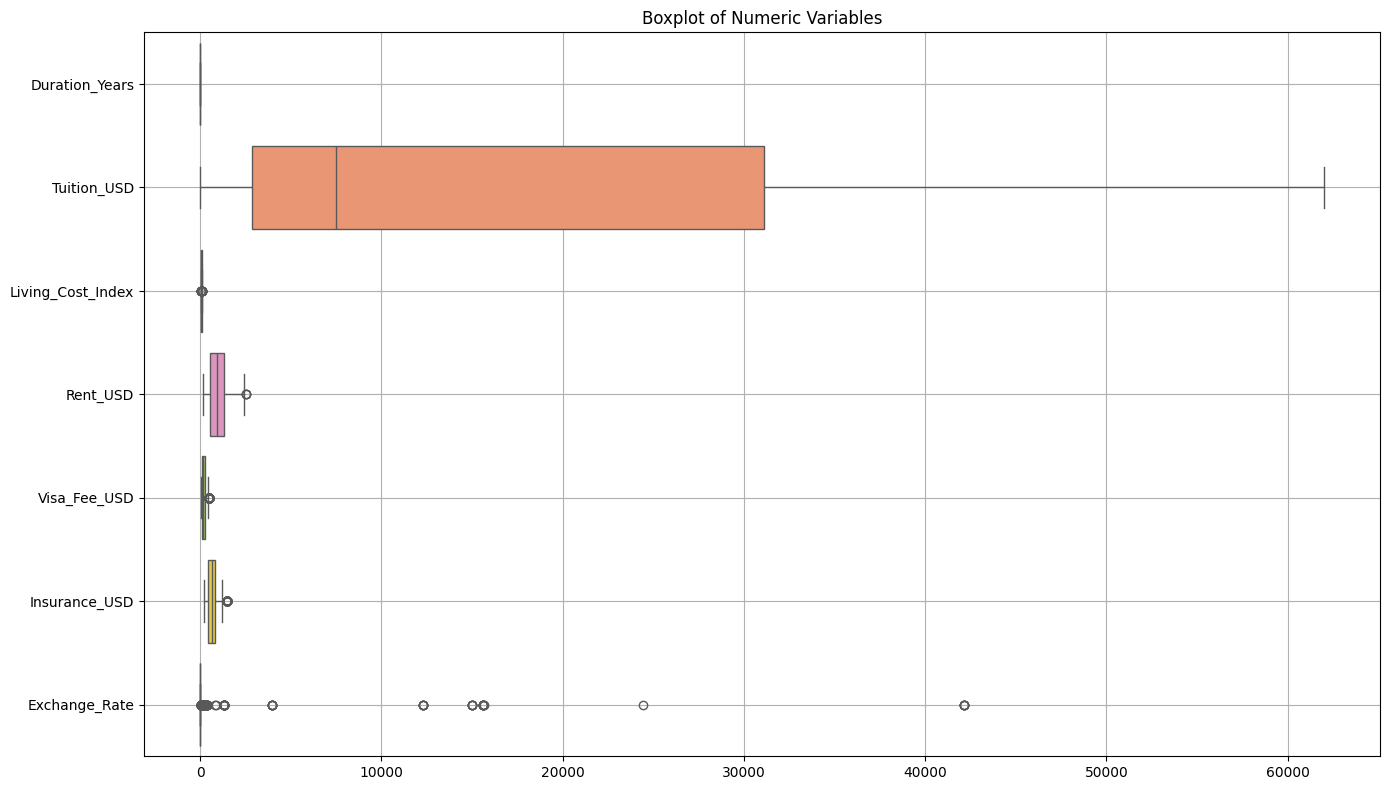

In [ ]:
numeric_cols = df.select_dtypes(include='number')

# Create boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(data=numeric_cols, orient='h', palette='Set2')
plt.title('Boxplot of Numeric Variables')
plt.grid(True)
plt.tight_layout()
plt.show()

**Observations :**

*   Exchange_Rate : Clearly has extreme outliers, with one value (42,150) far beyond the rest
*   Tuition_USD : Shows strong right skewness and visible outliers beyond $31,100
*   Rent_USD, Visa_Fee_USD, and Insurance_USD : Also contain some outliers beyond their typical range
*   Living_Cost_Index and Duration_Years: Appear relatively normal, with no extreme outliers







###Remove the Outliers using IQR

In [ ]:
# Identify the quartiles
q1, q3 = np.percentile(df['Tuition_USD'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers Tuition USD
clean_data = df[(df['Tuition_USD'] >= lower_bound)
                & (df['Tuition_USD'] <= upper_bound)]

In [ ]:
# Identify the quartiles
q1, q3 = np.percentile(df['Rent_USD'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers Rent USD
clean_data = df[(df['Rent_USD'] >= lower_bound)
                & (df['Rent_USD'] <= upper_bound)]

In [ ]:
# Identify the quartiles
q1, q3 = np.percentile(df['Visa_Fee_USD'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers Visa Fee USD
clean_data = df[(df['Visa_Fee_USD'] >= lower_bound)
                & (df['Visa_Fee_USD'] <= upper_bound)]

In [ ]:
# Identify the quartiles
q1, q3 = np.percentile(df['Insurance_USD'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers Visa Fee USD
clean_data = df[(df['Insurance_USD'] >= lower_bound)
                & (df['Insurance_USD'] <= upper_bound)]

In [ ]:
# Identify the quartiles
q1, q3 = np.percentile(df['Exchange_Rate'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers Visa Fee USD
clean_data = df[(df['Exchange_Rate'] >= lower_bound)
                & (df['Exchange_Rate'] <= upper_bound)]

###Statistical Analysis and Box Plot after Removing the Outliers

In [ ]:
clean_data.describe()

,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
count,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000
mean,2.831978,19478.252033,67.469512,1089.376694,232.001355,759.444444,2.007873
std,0.939965,17134.268948,12.071728,489.338314,150.222391,311.533329,2.375171
min,1.000000,0.000000,29.800000,150.000000,60.000000,200.000000,0.150000
25%,2.000000,3400.000000,63.200000,785.000000,110.000000,600.000000,0.920000
50%,3.000000,18950.000000,68.600000,1000.000000,160.000000,720.000000,1.000000
75%,4.000000,33575.000000,72.500000,1400.000000,450.000000,800.000000,1.520000
max,5.000000,62000.000000,122.400000,2500.000000,490.000000,1500.000000,12.000000


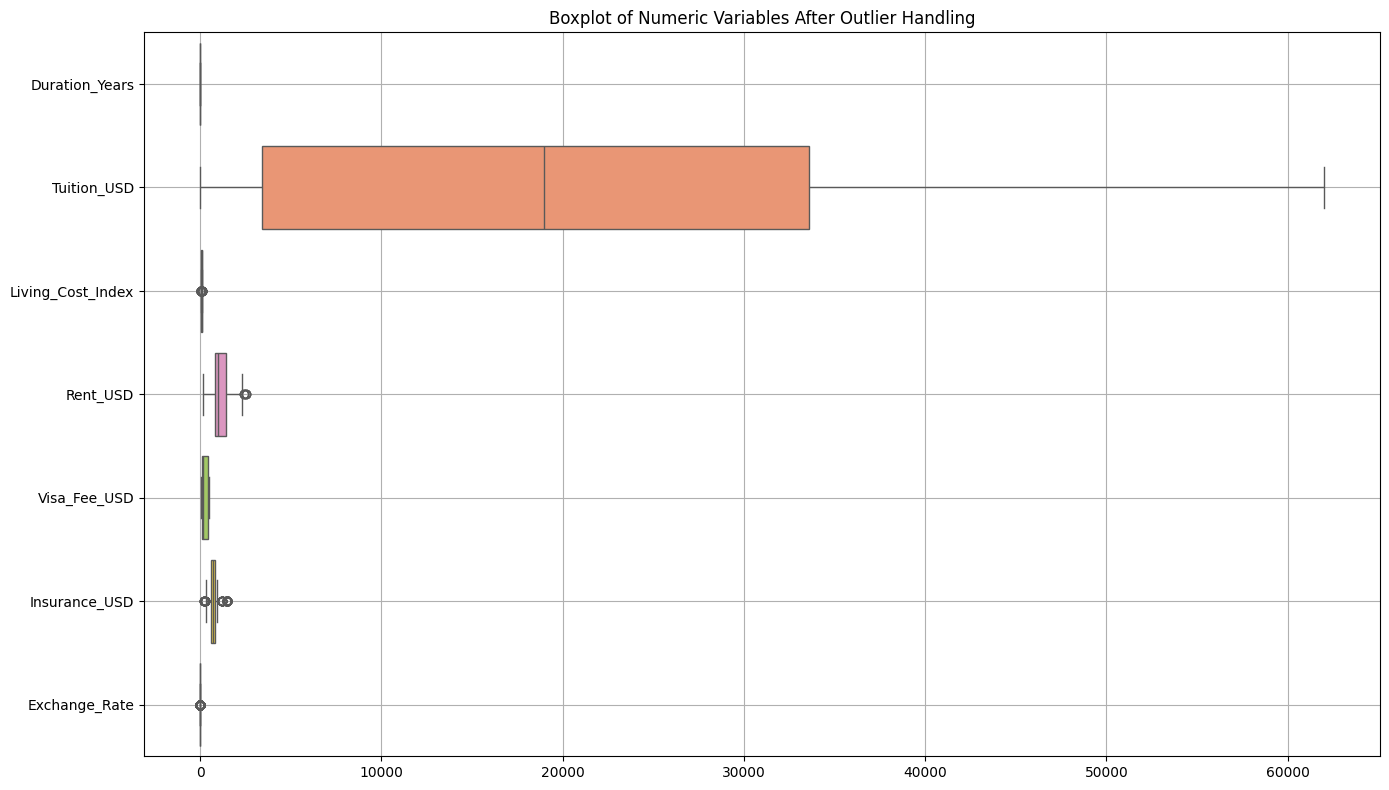

In [ ]:
# Create boxplot after outlier handling
numeric_cols_clean = clean_data.select_dtypes(include='number')

plt.figure(figsize=(14, 8))
sns.boxplot(data=numeric_cols_clean, orient='h', palette='Set2')
plt.title('Boxplot of Numeric Variables After Outlier Handling')
plt.grid(True)
plt.tight_layout()
plt.show()


###Clean data after removing outliers

In [ ]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 738 entries, 0 to 906
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            738 non-null    object 
 1   City               738 non-null    object 
 2   University         738 non-null    object 
 3   Program            738 non-null    object 
 4   Level              738 non-null    object 
 5   Duration_Years     738 non-null    float64
 6   Tuition_USD        738 non-null    int64  
 7   Living_Cost_Index  738 non-null    float64
 8   Rent_USD           738 non-null    int64  
 9   Visa_Fee_USD       738 non-null    int64  
 10  Insurance_USD      738 non-null    int64  
 11  Exchange_Rate      738 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 75.0+ KB


                   Duration_Years  Tuition_USD  Living_Cost_Index  Rent_USD  \
Duration_Years           1.000000     0.178118          -0.012374  0.094612   
Tuition_USD              0.178118     1.000000           0.317337  0.691776   
Living_Cost_Index       -0.012374     0.317337           1.000000  0.783734   
Rent_USD                 0.094612     0.691776           0.783734  1.000000   
Visa_Fee_USD             0.018470     0.472765           0.150186  0.276194   
Insurance_USD            0.132386     0.539108           0.679718  0.728349   
Exchange_Rate           -0.026215    -0.336411          -0.337225 -0.319895   

                   Visa_Fee_USD  Insurance_USD  Exchange_Rate  
Duration_Years         0.018470       0.132386      -0.026215  
Tuition_USD            0.472765       0.539108      -0.336411  
Living_Cost_Index      0.150186       0.679718      -0.337225  
Rent_USD               0.276194       0.728349      -0.319895  
Visa_Fee_USD           1.000000       0.008420 

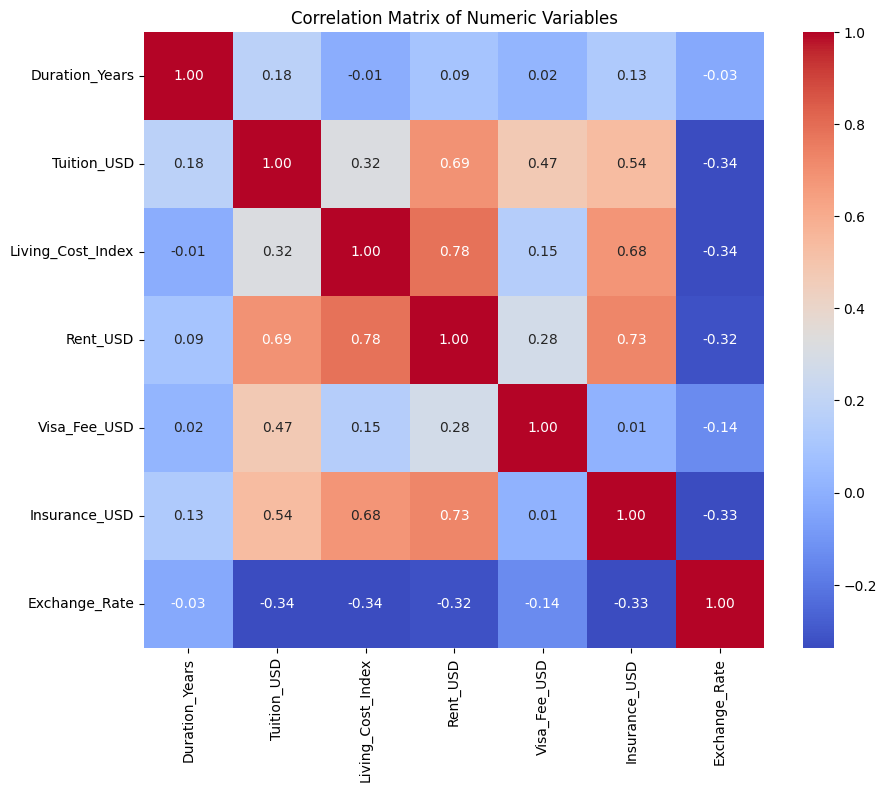

In [ ]:
# Calculate the correlation matrix only for numeric columns
numeric_cols = clean_data.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

**Observations**
*   The strongest correlation is between Living_Cost_Index and Rent_USD, with a correlation value of 0.78. This indicates a strong positive relationship meaning the higher the living cost index in a city, the more expensive the rent tends to be
*   Another strong correlation is found between Rent_USD and Insurance_USD, showing a fairly significant relationship
*   On other hand, the weakest correlation is between Exchange_Rate and Duration_Years, with a value of around -0.03, suggesting almost no linear relationship between these two variables





###Distribution of Each Variables


Value counts for Country:
 Country
UK                93
Australia         86
USA               78
Canada            76
Germany           33
                  ..
Czech Republic     1
Hong Kong          1
Israel             1
Nigeria            1
Vietnam            1
Name: count, Length: 71, dtype: int64


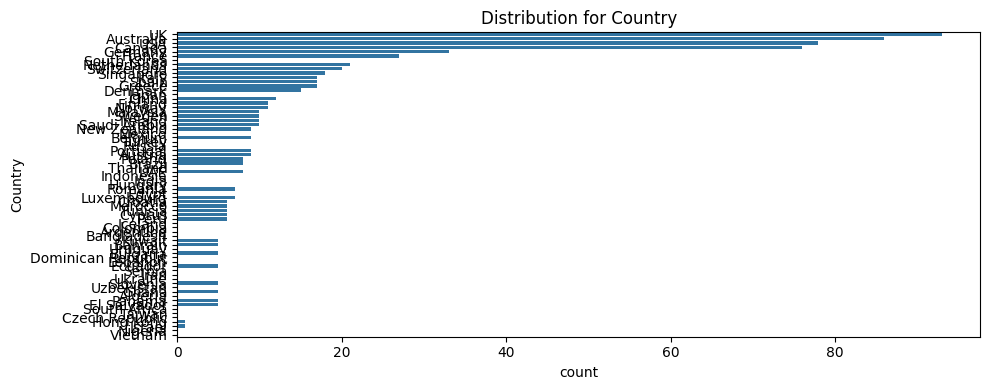


Value counts for City:
 City
Singapore      18
Sydney         11
Melbourne      11
London         10
Canberra        8
               ..
Penang          1
Santa Tecla     1
Andijan         1
Tabriz          1
Subotica        1
Name: count, Length: 556, dtype: int64


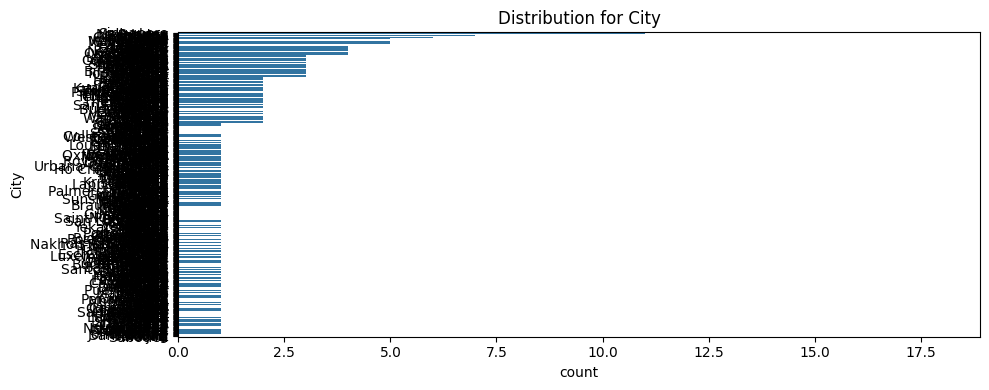


Value counts for University:
 University
University of Washington           6
Stanford University                5
Australian National University     5
University of Tasmania             5
University of Western Australia    5
                                  ..
USM                                1
Universidad Politecnica            1
Imperial College                   1
ITCA-FEPADE                        1
Andijan State University           1
Name: count, Length: 622, dtype: int64


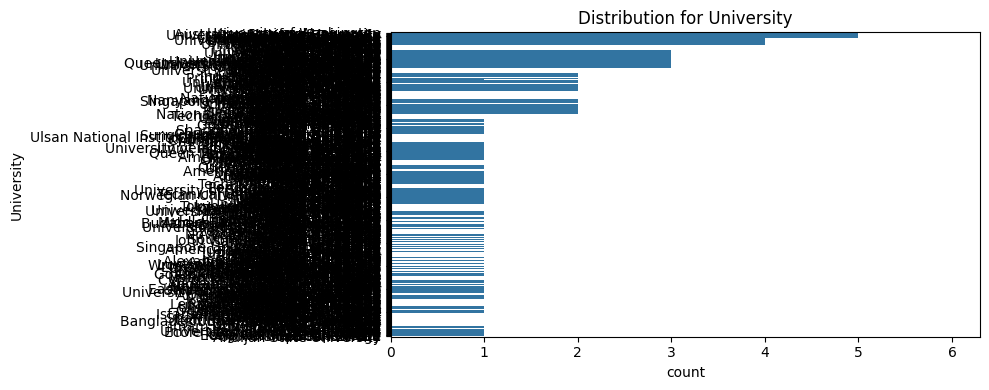


Value counts for Program:
 Program
Computer Science           312
Data Science                82
Computer Engineering        71
Software Engineering        57
Artificial Intelligence     53
                          ... 
Electronics                  1
Electronic Engineering       1
Digital Design               1
Digital Business             1
Data Systems                 1
Name: count, Length: 92, dtype: int64


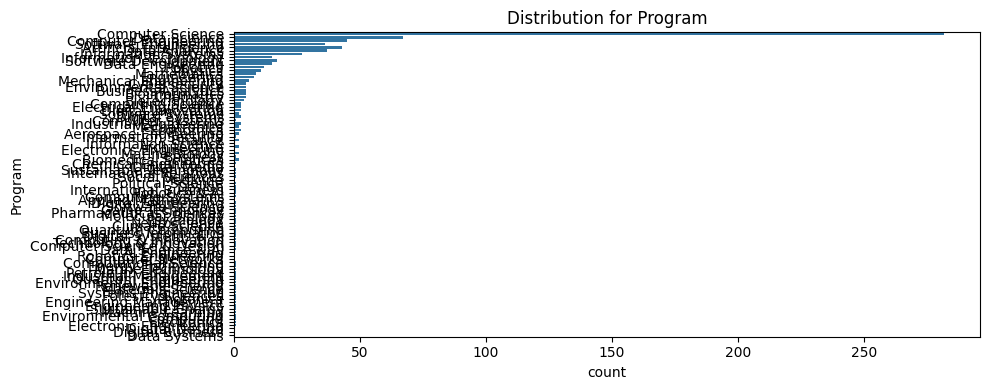


Value counts for Level:
 Level
Master      451
Bachelor    297
PhD         159
Name: count, dtype: int64


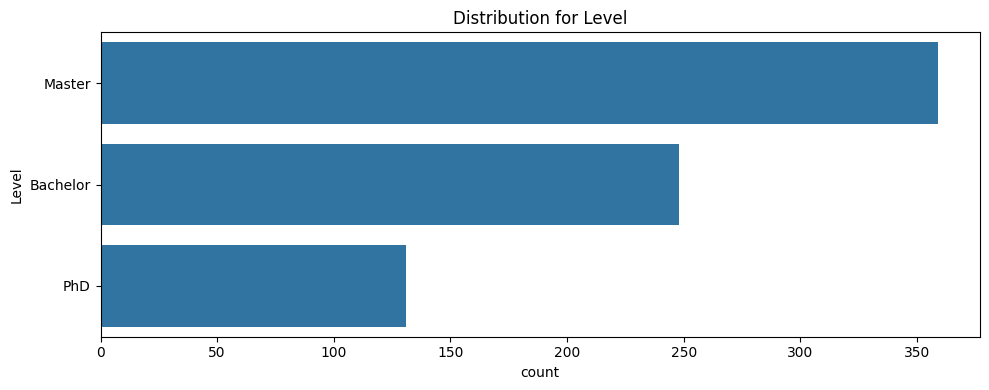

In [ ]:
categorical_cols = clean_data.select_dtypes(include='object').columns
for col in categorical_cols:
  print(f"\nValue counts for {col}:\n", df[col].value_counts())
  plt.figure(figsize=(10, 4))
  sns.countplot(data=clean_data, y=col, order=df[col].value_counts().index)
  plt.title(f'Distribution for {col}')
  plt.tight_layout()
  plt.show()


Top 5 value counts for Country:
 Country
UK           93
Australia    86
USA          78
Canada       76
Germany      33
Name: count, dtype: int64


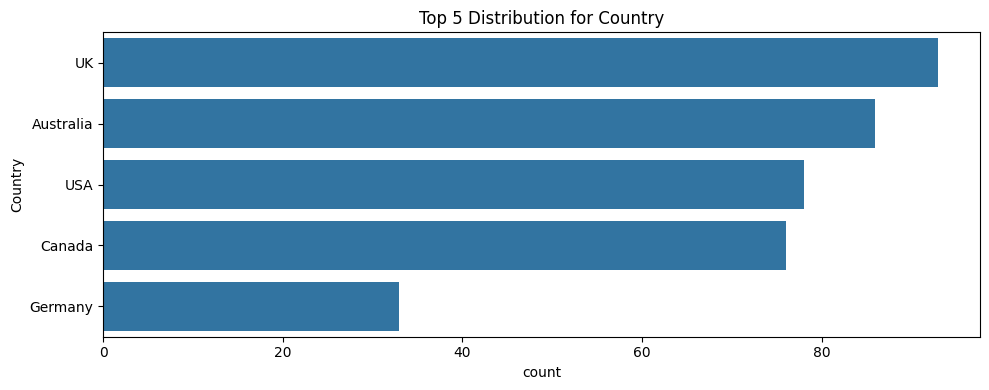


Top 5 value counts for City:
 City
Singapore    18
Sydney       11
Melbourne    11
London       10
Canberra      8
Name: count, dtype: int64


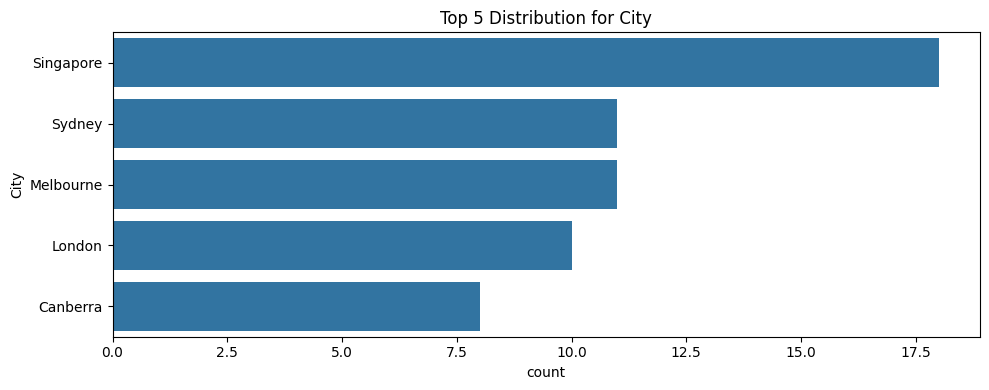


Top 5 value counts for University:
 University
University of Washington    6
University of Melbourne     5
Stanford University         5
University of Sydney        5
University of Newcastle     5
Name: count, dtype: int64


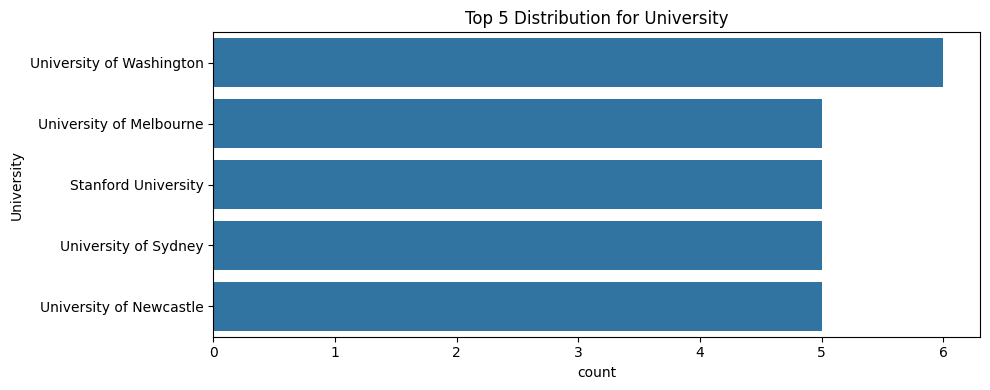


Top 5 value counts for Program:
 Program
Computer Science           282
Data Science                67
Computer Engineering        45
Artificial Intelligence     43
Data Analytics              37
Name: count, dtype: int64


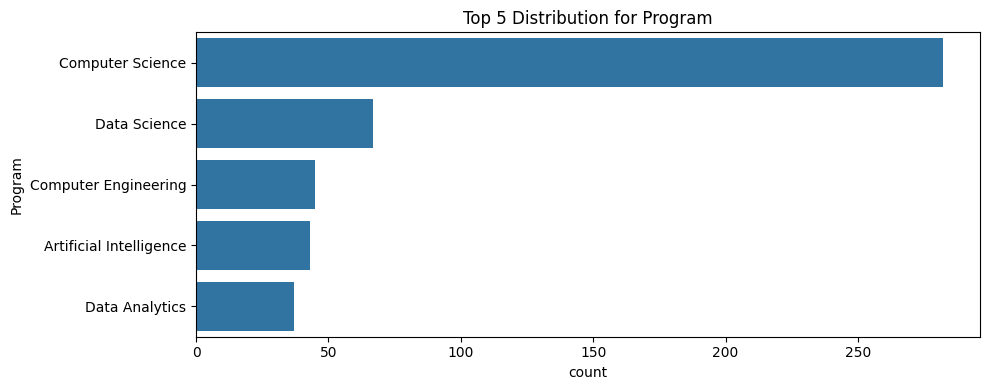


Top 5 value counts for Level:
 Level
Master      359
Bachelor    248
PhD         131
Name: count, dtype: int64


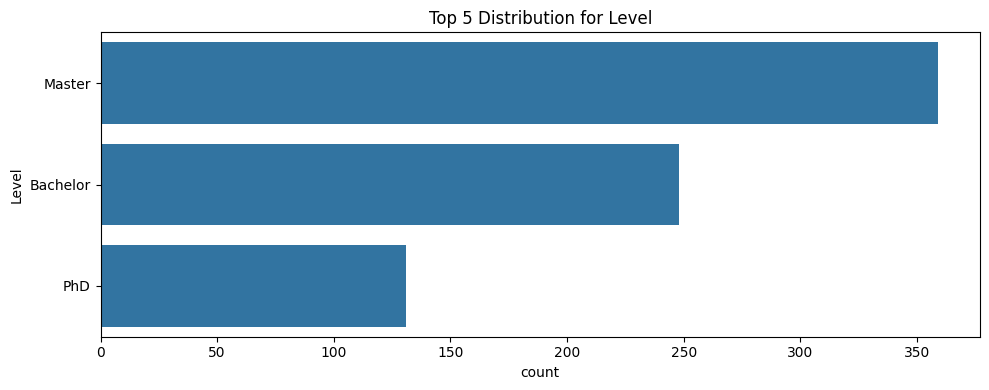

In [ ]:
categorical_cols = clean_data.select_dtypes(include='object').columns

for col in categorical_cols:
    top_5 = clean_data[col].value_counts().nlargest(5)
    print(f"\nTop 5 value counts for {col}:\n", top_5)

    plt.figure(figsize=(10, 4))
    sns.countplot(
        data=clean_data[clean_data[col].isin(top_5.index)],
        y=col,
        order=top_5.index
    )
    plt.title(f'Top 5 Distribution for {col}')
    plt.tight_layout()
    plt.show()

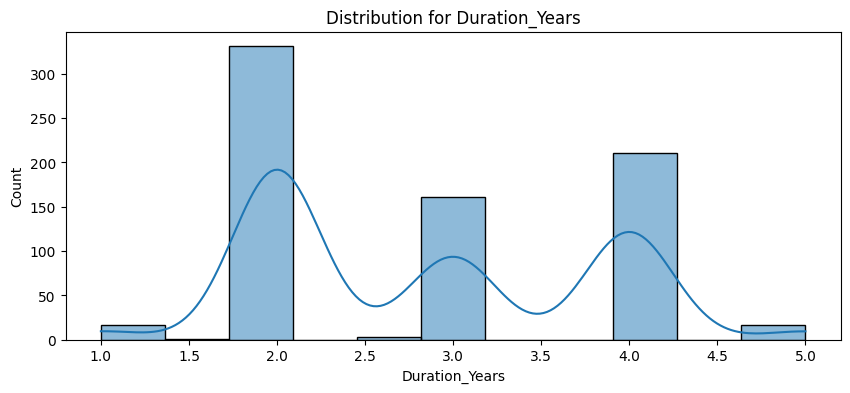

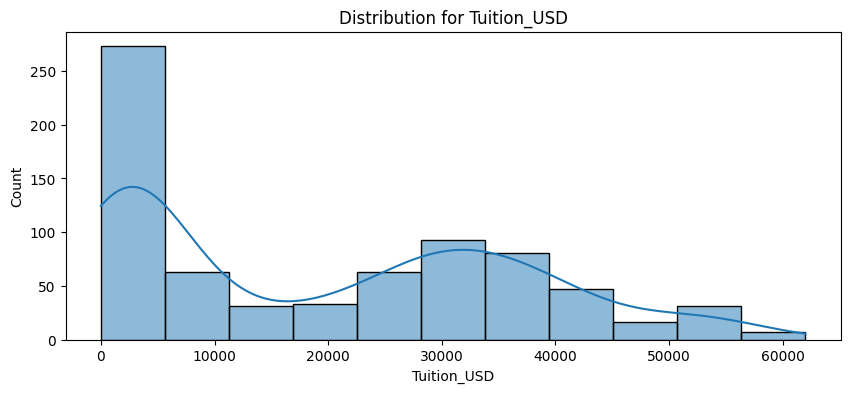

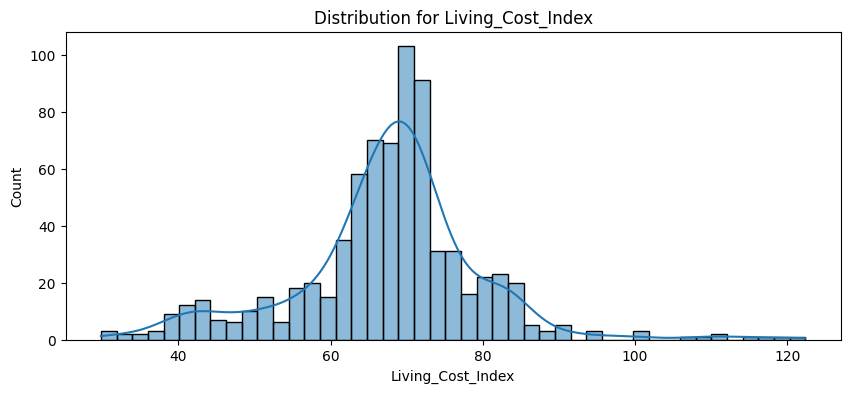

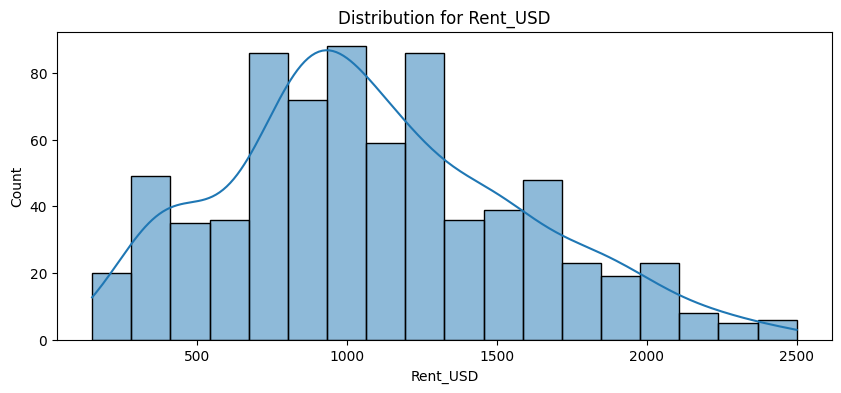

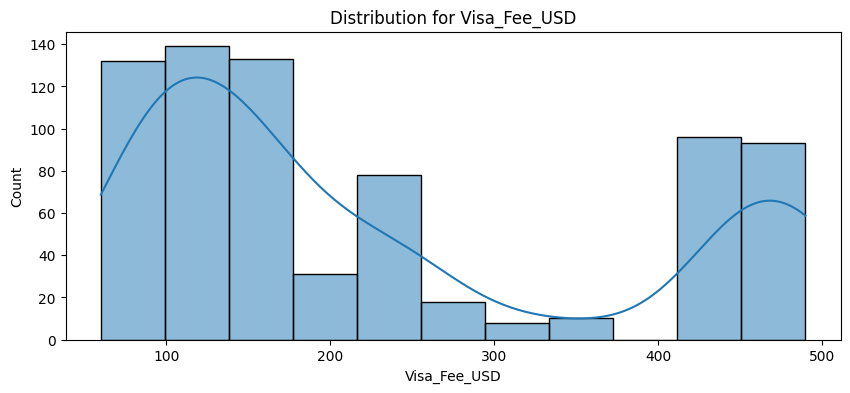

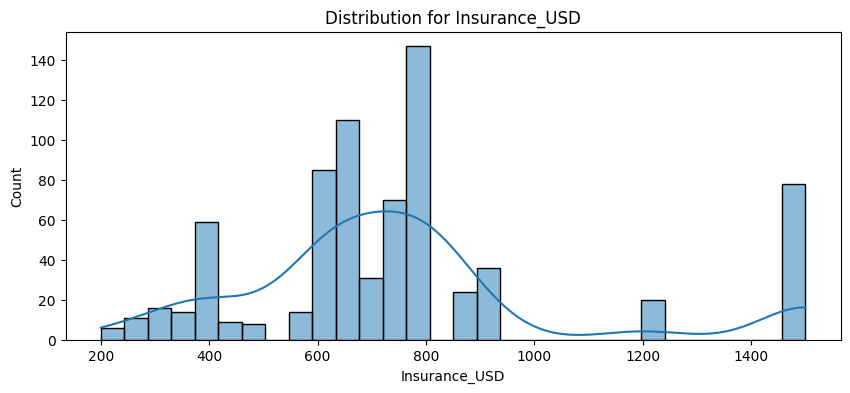

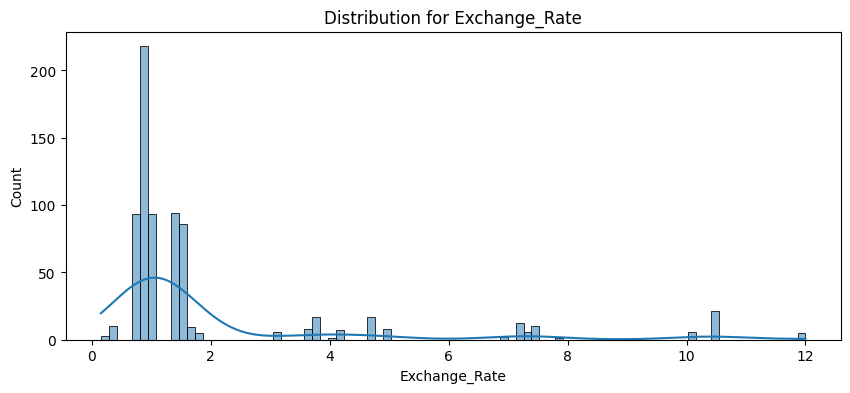

In [ ]:
numerical_cols = clean_data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
  plt.figure(figsize=(10, 4))
  sns.histplot(data=clean_data, x=col, kde=True)
  plt.title(f'Distribution for {col}')
  plt.xlabel(col)
  plt.tight_layout
  plt.show()

###Predict Top Budget Education Cost
Predicting or calculating the total study budget per region (country) by summing all cost components (in USD), then multiplying the result by the Exchange_Rate to get the total cost in the local curency


In [ ]:
# Step 1: Create new column for Total USD
clean_data['Total_USD'] = (
    clean_data['Tuition_USD'] +
    clean_data['Rent_USD'] +
    clean_data['Visa_Fee_USD'] +
    clean_data['Insurance_USD']
)

# Step 2: Convert into local currency
clean_data['Total_Local_Currency'] = clean_data['Total_USD'] * clean_data['Exchange_Rate']

# Step 3: Count average of budget by grouping Country
average_budget_per_country = clean_data.groupby('Country')['Total_Local_Currency'].mean().sort_values(ascending=False)

# Show top 10 countries with the highest cost
print("Top 10 countries with the highest average cost of living and tuition (in local currency):")
print(average_budget_per_country.head(10))

# Show top 10 countries with the lowest cost
print("Top 10 countries with the lowest average cost of living and tuition (in local currency):")
print(average_budget_per_country.tail(10))


Top 10 countries with the highest average cost of living and tuition (in local currency):
Country
Hong Kong      189400.400000
UAE             97626.587500
China           62522.575000
Australia       56349.581395
Ghana           55224.000000
Israel          52638.000000
New Zealand     51544.144444
USA             51261.282051
Singapore       48986.900000
Canada          42582.019737
Name: Total_Local_Currency, dtype: float64
Top 10 countries with the lowest average cost of living and tuition (in local currency):
Country
Slovenia       4692.000000
Spain          4437.105882
Kuwait         4140.360000
Switzerland    3968.332000
Bahrain        3404.800000
Austria        3004.311111
Luxembourg     2286.857143
Germany        1832.333333
Finland        1670.218182
Greece         1207.364706
Name: Total_Local_Currency, dtype: float64


<ipython-input-20-75e8144fefdd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Total_USD'] = (
<ipython-input-20-75e8144fefdd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Total_Local_Currency'] = clean_data['Total_USD'] * clean_data['Exchange_Rate']


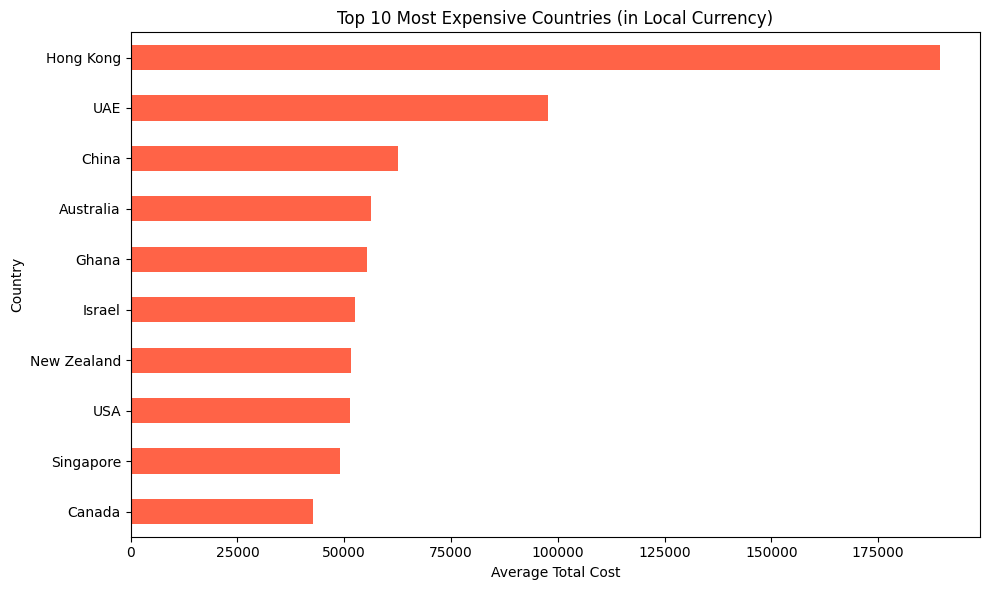

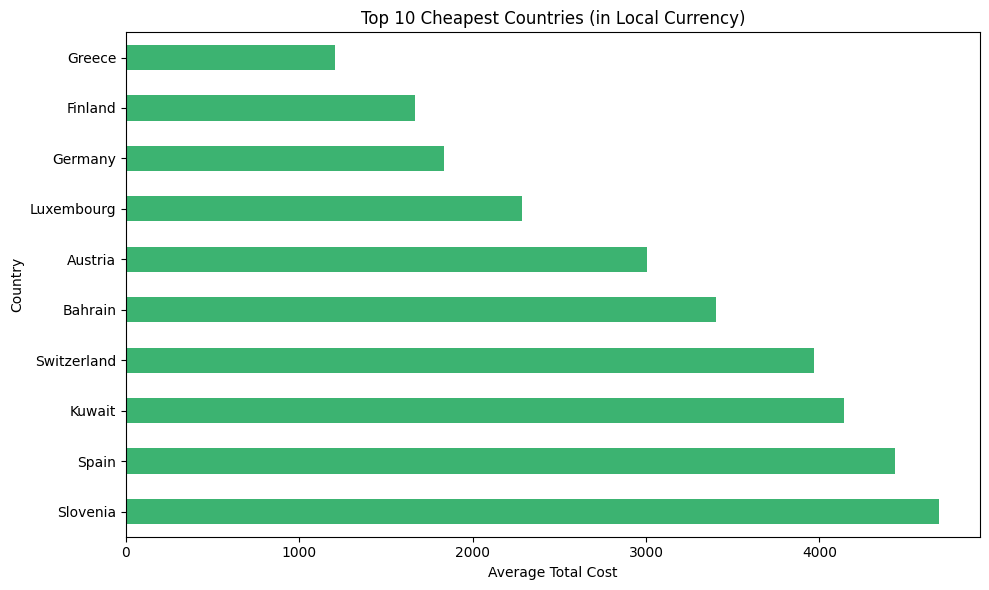

In [ ]:
top_10_expensive = average_budget_per_country.head(10)

plt.figure(figsize=(10, 6))
top_10_expensive.plot(kind='barh', color='tomato')
plt.title('Top 10 Most Expensive Countries (in Local Currency)')
plt.xlabel('Average Total Cost')
plt.ylabel('Country')
plt.gca().invert_yaxis()  # Highest on top
plt.tight_layout()
plt.show()

# Example: Top 10 cheapest cities
bottom_10_cheap = average_budget_per_country.tail(10)

plt.figure(figsize=(10, 6))
bottom_10_cheap.plot(kind='barh', color='mediumseagreen')
plt.title('Top 10 Cheapest Countries (in Local Currency)')
plt.xlabel('Average Total Cost')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

<ipython-input-22-410ef48c4e75>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_tuition_df, x='Tuition_USD', y='Program', palette='Blues_r')


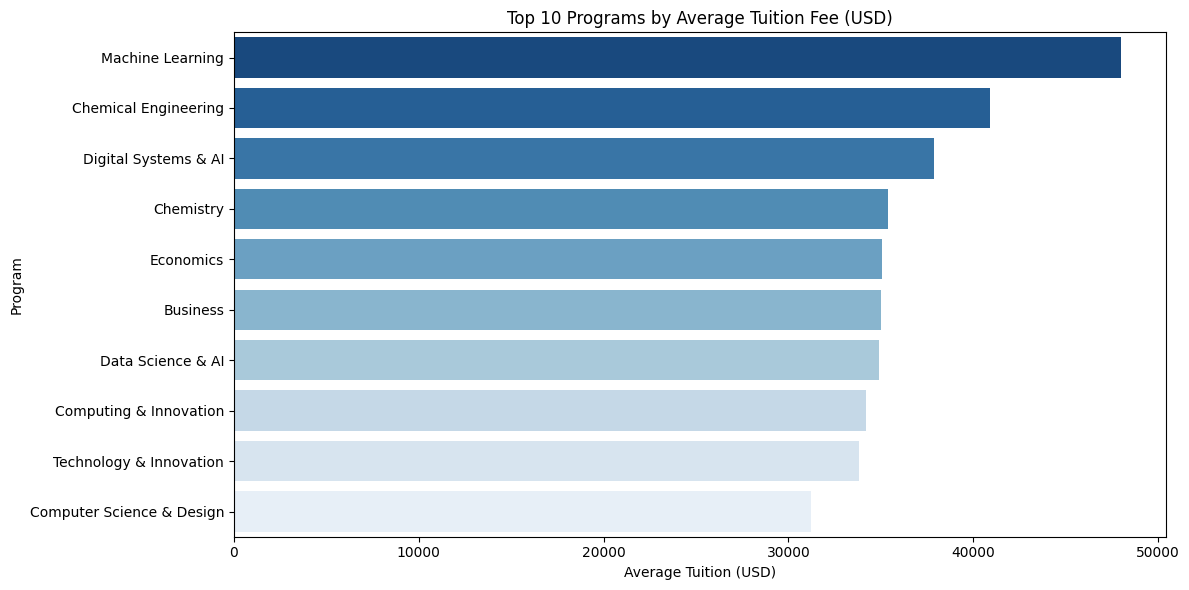

In [ ]:
# Step 1: Group by Program and get average tuition
top_tuition_programs = clean_data.groupby('Program')['Tuition_USD'].mean().sort_values(ascending=False).head(10)

# Step 2: Reset index for plotting
top_tuition_df = top_tuition_programs.reset_index()

# Step 3: Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=top_tuition_df, x='Tuition_USD', y='Program', palette='Blues_r')
plt.title('Top 10 Programs by Average Tuition Fee (USD)')
plt.xlabel('Average Tuition (USD)')
plt.ylabel('Program')
plt.tight_layout()
plt.show()

In [ ]:
# Sort the dataset by Tuition_USD in descending order
top_tuition = clean_data.sort_values(by='Tuition_USD', ascending=False)

# Select relevant columns: Tuition_USD, Program, and University
top_tuition_info = top_tuition[['Tuition_USD', 'Program', 'University', 'Country', 'City']].head(10)

# Display top 10
print(top_tuition_info)


     Tuition_USD                  Program             University Country  \
877        62000             Data Science    Columbia University     USA   
412        62000                Economics    Columbia University     USA   
849        58000  Artificial Intelligence     Harvard University     USA   
452        58000             Data Science  University of Chicago     USA   
397        58000         Computer Science                    MIT     USA   
891        58000  Artificial Intelligence  University of Chicago     USA   
214        57000         Computer Science    Stanford University     USA   
437        56000             Data Science        Carnegie Mellon     USA   
870        56000                 Robotics          Massachusetts     USA   
553        56000     Software Engineering        Carnegie Mellon     USA   

           City  
877    New York  
412    New York  
849      Boston  
452     Chicago  
397      Boston  
891     Chicago  
214    Stanford  
437  Pittsburgh  
8

<ipython-input-24-1354c36466c8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_tuition_info, x='Tuition_USD', y='Label', palette='Reds_r')


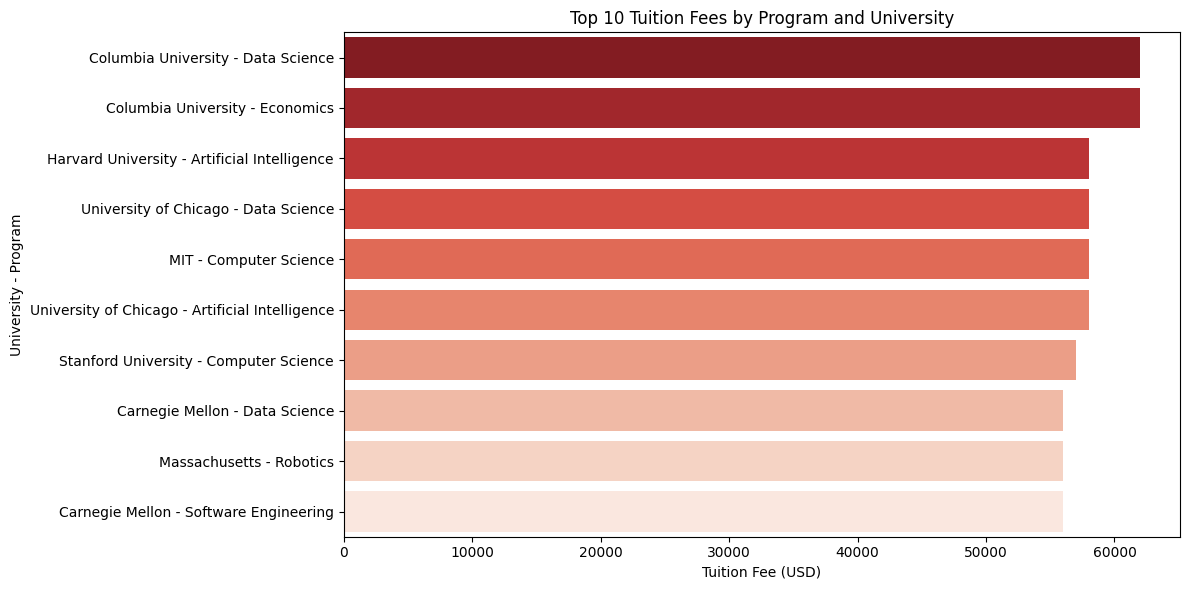

In [ ]:
# Create label for plotting
top_tuition_info['Label'] = top_tuition_info['University'] + ' - ' + top_tuition_info['Program']

plt.figure(figsize=(12, 6))
sns.barplot(data=top_tuition_info, x='Tuition_USD', y='Label', palette='Reds_r')
plt.title('Top 10 Tuition Fees by Program and University')
plt.xlabel('Tuition Fee (USD)')
plt.ylabel('University - Program')
plt.tight_layout()
plt.show()


In [ ]:
# Group by university and calculate the average tuition fee
top_universities = clean_data.groupby('University')['Tuition_USD'].mean().sort_values(ascending=False)

# Display top 10 universities
top_universities = top_universities.head(10).reset_index()
print(top_universities)


                University   Tuition_USD
0      Columbia University  58933.333333
1       Harvard University  56700.000000
2    University of Chicago  56133.333333
3            Massachusetts  56000.000000
4                      MIT  55866.666667
5          Yale University  54500.000000
6          Carnegie Mellon  54400.000000
7      Stanford University  54040.000000
8     Princeton University  54000.000000
9  Northeastern University  54000.000000


<ipython-input-26-f49171784531>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_universities, x='Tuition_USD', y='University', palette='viridis')


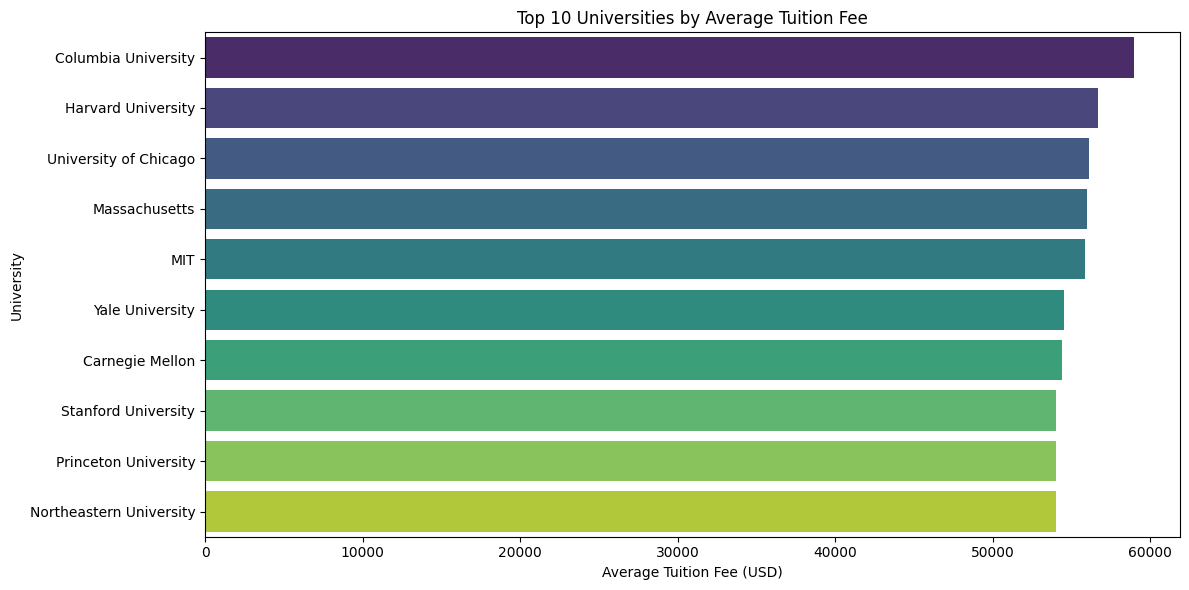

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_universities, x='Tuition_USD', y='University', palette='viridis')
plt.title('Top 10 Universities by Average Tuition Fee')
plt.xlabel('Average Tuition Fee (USD)')
plt.ylabel('University')
plt.tight_layout()
plt.show()